In [1]:
import numpy as np
import pandas as pd
from astropy.coordinates import Angle
import astropy.units as u
from tess_stars2px import tess_stars2px_function_entry
import tessreduce as tr

/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read data from TNS
df = pd.read_csv('data/tns_search_tde.csv')
df = df[(df['Redshift'] < 0.03) & (df['Name'] == 'TDE 2022dbl')]

In [3]:
# Convert RA & DEC to degrees
ra_deg = df['RA'].apply(lambda x: Angle(x, unit=u.hourangle).degree)
dec_deg = df['DEC'].apply(lambda x: Angle(x, unit=u.deg).degree)
coords_deg = list(zip(ra_deg, dec_deg))


RA: 185.187542, DEC: 49.551300
outID outSec outCam outCcd outColPix outRowPix
0 22 2 2 593.752061 1365.403891
getting TPF from TESScut
made reference


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


made source mask
calculating background


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel subm

background subtracted
aligning images
!!! skernel 125
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


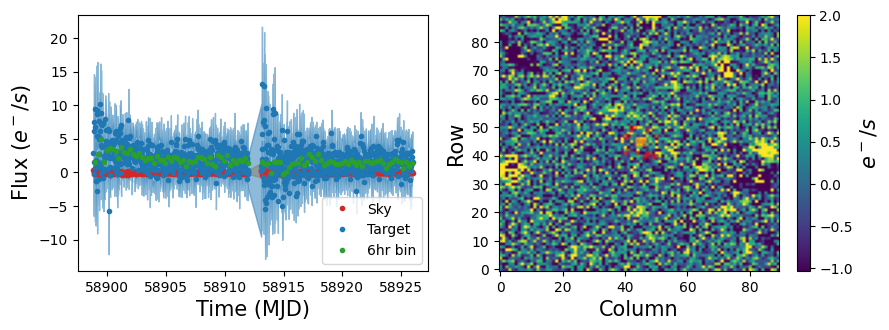

0 48 2 1 203.089552 1170.161574
getting TPF from TESScut
made reference
made source mask
calculating background


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel subm

background subtracted
aligning images
!!! skernel 371
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


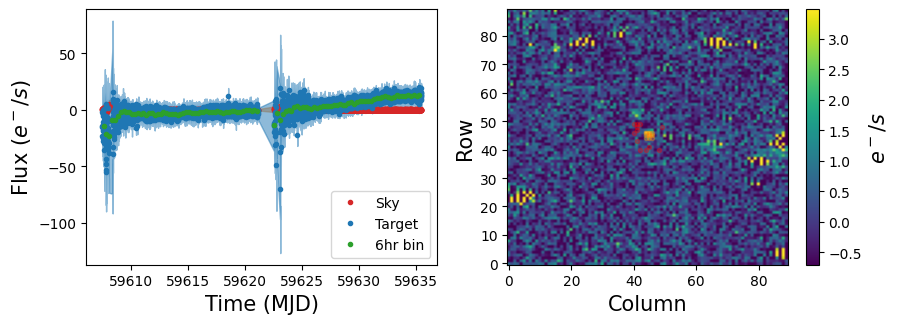

High correlation between lc and y shift: 0.73
0 49 2 2 1490.187153 1263.100656
getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
aligning images
!!! skernel 331
Something went wrong, switching to serial
!!Re-running for difference image!!
Traceback (most recent call last):
  File "/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/tessreduce/tessreduce.py", line 1937, in reduce
    self.shift_images()
    ~~~~~~~~~~~~~~~~~^^
  File "/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/tessreduce/tessreduce.py", line 955, in shift_images
    shifted[i] = shift(shifted[i],[self.shift[i,0],self.shift[i,1]],mode='nearest',order=5)#mode='constant',cval=np.nan)
                                   ~~~~~~~~~~^^^^^
TypeError: 'NoneType' object is not subscriptable



AttributeError: 'NoneType' object has no attribute 'T'

In [4]:
for ra, dec in coords_deg:
    print(f"\nRA: {ra:.6f}, DEC: {dec:.6f}")
    # TESS point
    ticid = 0 # code doesn't actually use ticid
    print('outID outSec outCam outCcd outColPix outRowPix')
    outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = tess_stars2px_function_entry(ticid, ra, dec)
    for i in range(len(outID)):
        print('{0:d} {1:d} {2:d} {3:d} {4:f} {5:f}'.format(outID[i], outSec[i], outCam[i], outCcd[i], outColPix[i], outRowPix[i]))
        # TESS reduce
        tess = tr.tessreduce(ra=ra, dec=dec, sector=outSec[i], savename=f'data/plots/ra{ra}_dec{dec}_sec{outSec[i]}')
        if tess.lc is not None:
            tess_lc_tp = tess.lc.T
            np.savez(f'data/lightcurves/ra{ra}_dec{dec}_sec{outSec[i]}.npz', lightcurve=tess_lc_tp)